In [5]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [6]:
iris=load_iris()
feature_names = [x[:-5].replace(' ','_') for x in iris.feature_names]
iris_df = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris_df)
iris_df['cluster'] = kmeans.labels_

In [8]:
iris_df['sil_coeff'] = score_samples

In [9]:
average_score = silhouette_score(iris.data, iris_df['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

붓꽃 데이터셋 Silhouette Analysis Score:0.553


In [10]:
iris_df.groupby('cluster')['sil_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: sil_coeff, dtype: float64

In [11]:

### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [19]:
def visualize_silhouette_scatter(cluster_lists, X_features):

    fig, axs = plt.subplots(figsize=(18, 4), nrows=1, ncols=len(cluster_lists))
    for pos, cluster in enumerate(cluster_lists):
        cluster_df = pd.DataFrame(data=X_features[:,:2], columns=['ftr1', 'ftr2'])
        kmeans = KMeans(n_clusters=cluster, init='k-means++', max_iter=500, random_state=0)
        cluster_labels = kmeans.fit_predict(X_features)
        cluster_df['kmeans_label'] = cluster_labels
        centers = kmeans.cluster_centers_
        unique_labels = np.unique(cluster_labels)
        
        for label in unique_labels:
            # 각각의 label 별 구분
            label_cluster = cluster_df[cluster_df['kmeans_label']==label]
            center_x_y = centers[label]

            # 구분 점 표시
            axs[pos].scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolors='k',
                        marker=markers[label])

            # 중심 위치 좌표 시각화
            axs[pos].scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                        alpha=0.9, edgecolors='k', marker=markers[label])
            axs[pos].scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                        edgecolors='k', marker='$%d$'%label)
            
        axs[pos].set_xlabel('ftr1')
        axs[pos].set_ylabel('ftr2')
        axs[pos].set_title('Number of Cluster: {}'.format(cluster))

    plt.show()

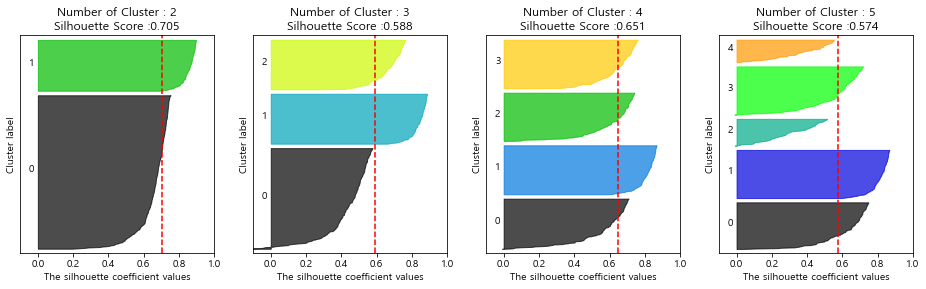

In [20]:

# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

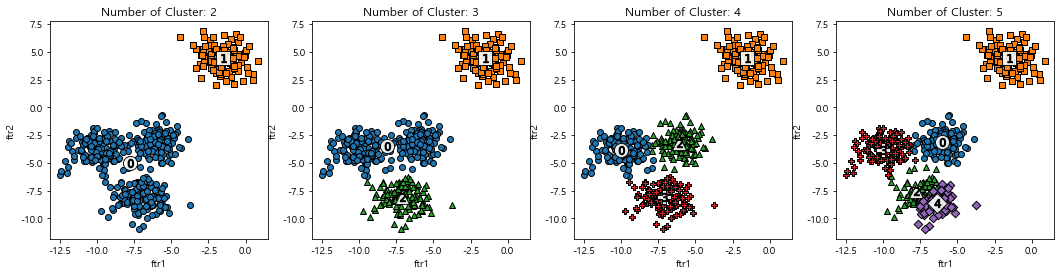

In [21]:
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
visualize_silhouette_scatter([ 2, 3, 4, 5], X)